<a href="https://colab.research.google.com/github/karanaithal01/WAIE/blob/master/Final_food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tflearn

     |████████████████████████████████| 107 kB 4.9 MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=5c2f8d0424a696145a6abc8f994e2080776412877e0ebe07872526460c0ec2f3
  Stored in directory: /root/.cache/pip/wheels/5f/14/2e/1d8e28cc47a5a931a2fb82438c9e37ef9246cc6a3774520271
Successfully built tflearn


In [2]:
!git clone https://github.com/karanaithal01/WAIE
%cd WAIE

Cloning into 'WAIE'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 40 (delta 6), reused 32 (delta 2), pack-reused 0
Unpacking objects: 100% (40/40), done.
/content/WAIE


In [3]:
ls

 1.jpg
 2.PNG
 3.png
 Accuracy_Validation.svg
 calorie.py
 cnn_model.py
 _config.yml
 demo.py
 DFINALipynb.ipynb
'_foods calories estimation using Image Processing.pdf'
'graph_run=Fruits_dectector-0.001-5conv-basic.png'
 image_segment.py
 labels.npy
 LICENSE
 Loss_Validation.svg
 model/
 README.md
 test_image.JPG
 train.py


In [4]:
#image_segment
import cv2
import numpy as np
import os

def getAreaOfFood(img1):
    data=os.path.join(os.getcwd(),"images")
    if os.path.exists(data):
        print('folder exist for images at ',data)
    else:
        os.mkdir(data)
        print('folder created for images at ',data)
        
    cv2.imwrite('{}\\1 original image.jpg'.format(data),img1)
    img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    cv2.imwrite('{}\\2 original image BGR2GRAY.jpg'.format(data),img)
    img_filt = cv2.medianBlur( img, 5)
    cv2.imwrite('{}\\3 img_filt.jpg'.format(data),img_filt)
    img_th = cv2.adaptiveThreshold(img_filt,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,21,2)
    cv2.imwrite('{}\\4 img_th.jpg'.format(data),img_th)
    contours, hierarchy = cv2.findContours(img_th, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE) #make change here


	# find contours. sort. and find the biggest contour. the biggest contour corresponds to the plate and fruit.
    mask = np.zeros(img.shape, np.uint8)
    largest_areas = sorted(contours, key=cv2.contourArea)
    cv2.drawContours(mask, [largest_areas[-1]], 0, (255,255,255,255), -1)
    cv2.imwrite('{}\\5 mask.jpg'.format(data),mask)
    img_bigcontour = cv2.bitwise_and(img1,img1,mask = mask)
    cv2.imwrite('{}\\6 img_bigcontour.jpg'.format(data),img_bigcontour)

	# convert to hsv. otsu threshold in s to remove plate
    hsv_img = cv2.cvtColor(img_bigcontour, cv2.COLOR_BGR2HSV)
    cv2.imwrite('{}\\7 hsv_img.jpg'.format(data),hsv_img)
    h,s,v = cv2.split(hsv_img)
    mask_plate = cv2.inRange(hsv_img, np.array([0,0,50]), np.array([200,90,250]))
    cv2.imwrite('{}\\8 mask_plate.jpg'.format(data),mask_plate)
    mask_not_plate = cv2.bitwise_not(mask_plate)
    cv2.imwrite('{}\\9 mask_not_plate.jpg'.format(data),mask_not_plate)
    fruit_skin = cv2.bitwise_and(img_bigcontour,img_bigcontour,mask = mask_not_plate)
    cv2.imwrite('{}\\10 fruit_skin.jpg'.format(data),fruit_skin)

	#convert to hsv to detect and remove skin pixels
    hsv_img = cv2.cvtColor(fruit_skin, cv2.COLOR_BGR2HSV)
    cv2.imwrite('{}\\11 hsv_img.jpg'.format(data),hsv_img)
    skin = cv2.inRange(hsv_img, np.array([0,10,60]), np.array([10,160,255])) #Scalar(0, 10, 60), Scalar(20, 150, 255)
    cv2.imwrite('{}\\12 skin.jpg'.format(data),skin)
    not_skin = cv2.bitwise_not(skin); #invert skin and black
    cv2.imwrite('{}\\13 not_skin.jpg'.format(data),not_skin)
    fruit = cv2.bitwise_and(fruit_skin,fruit_skin,mask = not_skin) #get only fruit pixels
    cv2.imwrite('{}\\14 fruit.jpg'.format(data),fruit)
    
    fruit_bw = cv2.cvtColor(fruit, cv2.COLOR_BGR2GRAY)
    cv2.imwrite('{}\\15 fruit_bw.jpg'.format(data),fruit_bw)
    fruit_bin = cv2.inRange(fruit_bw, 10, 255) #binary of fruit
    cv2.imwrite('{}\\16 fruit_bw.jpg'.format(data),fruit_bin)

	#erode before finding contours
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    erode_fruit = cv2.erode(fruit_bin,kernel,iterations = 1)
    cv2.imwrite('{}\\17 erode_fruit.jpg'.format(data),erode_fruit)

	#find largest contour since that will be the fruit
    img_th = cv2.adaptiveThreshold(erode_fruit,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
    cv2.imwrite('{}\\18 img_th.jpg'.format(data),img_th)
    contours, hierarchy = cv2.findContours(img_th, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    mask_fruit = np.zeros(fruit_bin.shape, np.uint8)
    largest_areas = sorted(contours, key=cv2.contourArea)
    cv2.drawContours(mask_fruit, [largest_areas[-2]], 0, (255,255,255), -1)
    cv2.imwrite('{}\\19 mask_fruit.jpg'.format(data),mask_fruit)

	#dilate now
    kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    mask_fruit2 = cv2.dilate(mask_fruit,kernel2,iterations = 1)
    cv2.imwrite('{}\\20 mask_fruit2.jpg'.format(data),mask_fruit2)
    fruit_final = cv2.bitwise_and(img1,img1,mask = mask_fruit2)
    cv2.imwrite('{}\\21 fruit_final.jpg'.format(data),fruit_final)
    
	#find area of fruit
    img_th = cv2.adaptiveThreshold(mask_fruit2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
    cv2.imwrite('{}\\22 img_th.jpg'.format(data),img_th)
    contours, hierarchy = cv2.findContours(img_th, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    largest_areas = sorted(contours, key=cv2.contourArea)
    fruit_contour = largest_areas[-2]
    fruit_area = cv2.contourArea(fruit_contour)

	
	#finding the area of skin. find area of biggest contour
    skin2 = skin - mask_fruit2
    cv2.imwrite('{}\\23 skin2.jpg'.format(data),skin2)
	#erode before finding contours
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    skin_e = cv2.erode(skin2,kernel,iterations = 1)
    cv2.imwrite('{}\\24 skin_e .jpg'.format(data),skin_e )
    img_th = cv2.adaptiveThreshold(skin_e,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
    cv2.imwrite('{}\\25 img_th.jpg'.format(data),img_th)
    contours, hierarchy = cv2.findContours(img_th, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    mask_skin = np.zeros(skin.shape, np.uint8)
    largest_areas = sorted(contours, key=cv2.contourArea)
    cv2.drawContours(mask_skin, [largest_areas[-2]], 0, (255,255,255), -1)
    cv2.imwrite('{}\\26 mask_skin.jpg'.format(data),mask_skin)
    
    
    skin_rect = cv2.minAreaRect(largest_areas[-2])
    box = cv2.boxPoints(skin_rect)
    box = np.int0(box)
    mask_skin2 = np.zeros(skin.shape, np.uint8)
    cv2.drawContours(mask_skin2,[box],0,(255,255,255), -1)
    cv2.imwrite('{}\\27 mask_skin2.jpg'.format(data),mask_skin2)
    
    pix_height = max(skin_rect[1])
    pix_to_cm_multiplier = 5.0/pix_height
    skin_area = cv2.contourArea(box)
    
    
    return fruit_area,fruit_bin ,fruit_final,skin_area, fruit_contour, pix_to_cm_multiplier

In [5]:
#caleries
import cv2
import numpy as np
#density - gram / cm^3
density_dict = { 1:0.609, 2:0.94, 3:0.641,  4:0.641,5:0.513, 6:0.482,7:0.481}
#kcal
calorie_dict = { 1:52, 2:89,  3:41,4:16,5:40,6:47,7:18 }
#skin of photo to real multiplier
skin_multiplier = 5*2.3

def getCalorie(label, volume): #volume in cm^3
	calorie = calorie_dict[int(label)]
	density = density_dict[int(label)]
	mass = volume*density*1.0
	calorie_tot = (calorie/100.0)*mass
	return mass, calorie_tot, calorie #calorie per 100 grams

def getVolume(label, area, skin_area, pix_to_cm_multiplier, fruit_contour):
	area_fruit = (area/skin_area)*skin_multiplier #area in cm^2
	label = int(label)
	volume = 100
	if label == 1 or label == 5 or label == 7 or label == 6 : #sphere-apple,tomato,orange,kiwi,onion
		radius = np.sqrt(area_fruit/np.pi)
		volume = (4/3)*np.pi*radius*radius*radius
		#print (area_fruit, radius, volume, skin_area)
	
	if label == 2 or label == 4 or (label == 3 and area_fruit > 30): #cylinder like banana, cucumber, carrot
		fruit_rect = cv2.minAreaRect(fruit_contour)
		height = max(fruit_rect[1])*pix_to_cm_multiplier
		radius = area_fruit/(2.0*height)
		volume = np.pi*radius*radius*height
		
	if (label==4 and area_fruit < 30) : # carrot
		volume = area_fruit*0.5 #assuming width = 0.5 cm
	
	return volume

def calories(result,img):
    img_path =img # "C:/Users/M Sc-2/Desktop/dataset/FooD/"+str(j)+"_"+str(i)+".jpg"
    fruit_areas,final_f,areaod,skin_areas, fruit_contours, pix_cm = getAreaOfFood(img_path)
    volume = getVolume(result, fruit_areas, skin_areas, pix_cm, fruit_contours)
    mass, cal, cal_100 = getCalorie(result, volume)
    fruit_volumes=volume
    fruit_calories=cal
    fruit_calories_100grams=cal_100
    fruit_mass=mass
    #print("\nfruit_volumes",fruit_volumes,"\nfruit_calories",fruit_calories,"\nruit_calories_100grams",fruit_calories_100grams,"\nfruit_mass",fruit_mass)
    return fruit_calories

In [6]:
#cnn_model
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
import tensorflow as tf

def get_model(IMG_SIZE,no_of_fruits,LR):
	try:
		tf.reset_default_graph()
	except:
		print("tensorflow")
	convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 3], name='input')

	convnet = conv_2d(convnet, 32, 5, activation='relu')

	convnet = max_pool_2d(convnet, 5)

	convnet = conv_2d(convnet, 64, 5, activation='relu')

	convnet = max_pool_2d(convnet, 5)

	convnet = conv_2d(convnet, 128, 5, activation='relu')
	convnet = max_pool_2d(convnet, 5)

	convnet = conv_2d(convnet, 64, 5, activation='relu')
	convnet = max_pool_2d(convnet, 5)


	convnet = conv_2d(convnet, 32, 5, activation='relu')
	convnet = max_pool_2d(convnet, 5)

	convnet = fully_connected(convnet, 1024, activation='relu')
	convnet = dropout(convnet, 0.8)

	convnet = fully_connected(convnet, no_of_fruits, activation='softmax')
	convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

	model = tflearn.DNN(convnet, tensorboard_dir='log')

	return model

Instructions for updating:
non-resource variables are not supported in the long term


In [7]:
#demo
import os  
import cv2
import numpy as np

IMG_SIZE = 400
LR = 1e-3
no_of_fruits=7

MODEL_NAME = 'Fruits_dectector-{}-{}.model'.format(LR, '5conv-basic')

model_save_at=os.path.join("model",MODEL_NAME)

model=get_model(IMG_SIZE,no_of_fruits,LR)

model.load(model_save_at)
labels=list(np.load('labels.npy'))


tensorflow
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
INFO:tensorflow:Restoring parameters from /content/WAIE/model/Fruits_dectector-0.001-5conv-basic.model


folder created for images at  /content/WAIE/images


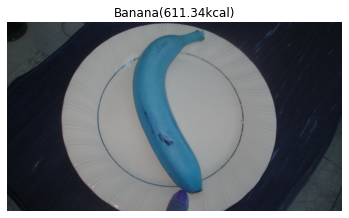

In [8]:
test_data='test_image.JPG'
img=cv2.imread(test_data)
img1=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
model_out=model.predict([img1])
result=np.argmax(model_out)
name=labels[result]
cal=round(calories(result+1,img),2)

import matplotlib.pyplot as plt
plt.imshow(img)
plt.title('{}({}kcal)'.format(name,cal))
plt.axis('off')
plt.show()

In [9]:
from google.colab import files
uploaded = files.upload()

Saving test_2.JPG to test_2.JPG
Saving test_3.JPG to test_3.JPG
Saving test_4.JPG to test_4.JPG
Saving test_5.JPG to test_5.JPG
Saving test_6.JPG to test_6.JPG
Saving test_7.JPG to test_7.JPG
Saving test_8.JPG to test_8.JPG


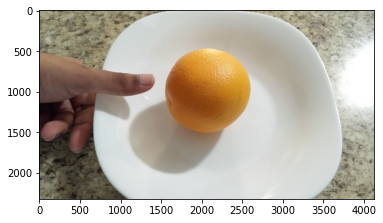

(2322, 4128, 3)


In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("test_2.JPG")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()
print(img.shape)

folder exist for images at  /content/WAIE/images


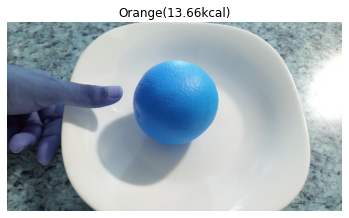

In [12]:
test_data='test_2.JPG'
img=cv2.imread(test_data)
img1=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
model_out=model.predict([img1])
result=np.argmax(model_out)
name=labels[result]
cal=round(calories(result+1,img),2)

import matplotlib.pyplot as plt
plt.imshow(img)
plt.title('{}({}kcal)'.format(name,cal))
plt.axis('off')
plt.show()